# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: Q1: Select the birth year the most popular people for bikes with gendar identification in the Chicago city?
            Q2: What is the number of bike trips pe month in Washington?

In [4]:
# Importing packages and functions
import csv # reading and writing to CSV files
import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import pandas as pd # converts CSV files into dataframes which are more 
                    # practical to use than plain text
import numpy as np # performs calculations
import matplotlib as mpl


In [5]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    # Read the first from from the dataf file and store it in a variable
    with open(filename, 'r') as f_in:
        
        # Use the csv library to set up a DictReader object.
        trip_reader = csv.DictReader(f_in)
        
        #  Use a function on the DictReader object to read the
        #  first trip from the data file and store it in a variable.
        first_trip = next(trip_reader)
        
        #  Use the pprint library to print the first trip. 
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['NYC-CitiBike-2016.csv',
              'Chicago-Divvy-2016.csv',
              'Washington-CapitalBikeshare-2016.csv']
# print the first trip from each file, store in dictionary to check the code works
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [6]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    """
    
    # Look up trip duration
    if city == 'NYC':
        duration = int(datum['tripduration'])
        
    elif city == 'Chicago':
        duration = int(datum['tripduration'])
        
    else:
        duration = int(datum['Duration (ms)'])/1000
    
    return duration/60

In [7]:
def date_string_to_weekday(date):
    """
    Takes date as a string in the form 'mm/dd/yyyy' and converts it
    to a week day
    """
    
    #dictionary to convert weekday number to day of week
    weekday_dictionary = {0: "Monday",
                          1: "Tuesday",
                          2: "Wednesday",
                          3: "Thursday",
                          4: "Friday",
                          5: "Saturday",
                          6: "Sunday"}
    
    #find weekday number
    month, day, year = date.split('/')
    week_day = datetime.datetime.weekday(datetime.date(int(year), 
                                                       int(month), 
                                                       int(day)))
    
    
    return weekday_dictionary[week_day]

def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    """

    if city == 'NYC':
         # extract month
        month =  datum['starttime'].split('/')[0]
        
        # extract hour
        hour = datum['starttime'].split()[1].split(':')[0]
        
        # get day of week
        day_of_week = date_string_to_weekday(datum['starttime'].split()[0])
        
    elif city == 'Chicago':
        
        # extract month
        month =  datum['starttime'].split('/')[0]
        
        # extract hour
        hour = datum['starttime'].split()[1].split(':')[0]
        
        # get day of week
        day_of_week = date_string_to_weekday(datum['starttime'].split()[0])
        
    else:
     
        # extract month
        month =  datum['Start date'].split('/')[0]
        
        # extract hour
        hour = datum['Start date'].split()[1].split(':')[0]
        
        # get day of week
        day_of_week = date_string_to_weekday(datum['Start date'].split()[0])
    
    return (int(month), int(hour), day_of_week)

In [8]:
def correct_member_type(user_type):
    """
    Converts the user type for the Washington dataset so that it fits the other
    datasets.
    """
    # Dictionary for the conversion
    user_type_dictionary = {"Registered":"Subscriber",
                            "Casual":"Customer"}
    
    # Converting member type
    new_user_type = user_type_dictionary[user_type]
        
    return new_user_type


def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    """
    
    if city == 'NYC': user_type = datum['usertype']
    elif city == 'Chicago': user_type = datum['usertype']
    else: user_type = correct_member_type(datum['Member Type'])
     
        
    
    return user_type

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [9]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # Set up csv DictWriter object - writer requires column names for the
        # First row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        trip_reader = csv.DictReader(f_in)
        
        #  Use a function on the DictReader object to read the
        #  first trip from the data file and store it in a variable.
        first_trip = next(trip_reader)
        

        """
        Variables I am working with because this function is a mess:
            out_colnames
        """
        
        # Collect data from and process each row
        for row in trip_reader:
            # Set up a dictionary to hold the values for the cleaned and trimmed
            # data points
            new_point = {}
            month, hour, day_of_week = time_of_trip(row, city)
            new_point[out_colnames[0]] = duration_in_mins(row, city)
            new_point[out_colnames[1]] = month
            new_point[out_colnames[2]] = hour
            new_point[out_colnames[3]] = day_of_week
            new_point[out_colnames[4]] = type_of_user(row, city)
            
            # Write row to new csv file
            trip_writer.writerow(new_point)

In [10]:
# Run this cell to check your work# Run t 
city_info = {'Washington': {'in_file': 'Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'Chicago-Divvy-2016.csv',
                         'out_file': 'Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'NYC-CitiBike-2016.csv',
                     'out_file': 'NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '9.792516666666668'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '3.3'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '11.433333333333334'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Subscriber')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: Following are the Answers: 1.)NYC has the hihgest no.of trips. 2.)NYC has the highest proportion of trips made by subscribers. 3.)Chicago has the highest proportion of trips made by short-term customers.

In [20]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    
    # Create dataframe
    df = pd.read_csv(filename)
    
    # initialize count variables
    n_subscribers = len(df[df['user_type']=='Subscriber'])
    n_customers = len(df[df['user_type']=='Customer'])
    
    # compute total number of rides
    n_total = n_subscribers + n_customers

    # return tallies as a tuple
    return(n_subscribers, n_customers, n_total)
  

In [21]:
## Modify this and the previous cell to answer Question 4a. Remember to run 
## the function on the cleaned data files you created from Question 3.    

data_file = 'BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))

data_file_NYC = 'NYC-2016-Summary.csv'

data_file_Washington = 'Washington-2016-Summary.csv'

data_file_Chicago = 'Chicago-2016-Summary.csv'

temp = proportion_users(data_file_NYC)
print("NYC: {}".format(number_of_trips(data_file_NYC)))
print("Proportion of Subscribers in NYC: {}%  Proportion of Customers in NYC: {}%\n".format(temp[0], temp[1]))

temp = proportion_users(data_file_Washington)
print("Washington: {}".format(number_of_trips(data_file_Washington)))
print("Proportion of Subscribers in Washington: {}%  Proportion of Customers in Washington: {}%\n".format(temp[0], temp[1]))

temp = proportion_users(data_file_Chicago)
print("Chicago: {}".format(number_of_trips(data_file_Chicago)))
print("Proportion of Subscribers in Chicago: {}%  Proportion of Customers in Chicago: {}%\n".format(temp[0], temp[1]))

(5666, 633, 6299)
NYC: (245896, 30184, 276080)
Proportion of Subscribers in NYC: 89.07%  Proportion of Customers in NYC: 10.93%

Washington: (51752, 14573, 66325)
Proportion of Subscribers in Washington: 78.03%  Proportion of Customers in Washington: 21.97%

Chicago: (54981, 17149, 72130)
Proportion of Subscribers in Chicago: 76.22%  Proportion of Customers in Chicago: 23.78%



> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: NYC: average travel time (min):  15.812599606691304, proportion over 30 mins:  0.07302463538260892
            Chicago: average travel time (min):  16.563645039049867, proportion over 30 mins:  0.08332178011922917
            Washington: average travel time (min):  18.93305161804247, proportion over 30 mins:  0.10839050131926121



In [13]:
def travel_time_stats(filename):
    """
    This function calculates the average travel time of the CSV summaries.
    Input is the file path and the returned value is a float.
    """
    
    # Create dataframe
    df = pd.read_csv(filename)
    
    # Calculate average
    average = np.average(df['duration'])
    
    # Calculate proportion of rides above 30 mins
    proportion = len(df[df['duration']>30])/len(df)

    return average, proportion

**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: NYC, Subscriber

In [14]:
## Modify this and the previous cell to answer Question 4b. ##

filepaths = ['NYC-2016-Summary.csv', 
             'Chicago-2016-Summary.csv', 
             'Washington-2016-Summary.csv']

# Display the data created by population_overtime function
for path in filepaths:    
    average_travel, proportion_overtime = travel_time_stats(path)
    print(path,": \n")
    print("average travel time (min): ", average_travel)
    print("proportion over 30 mins: ", proportion_overtime)
    print("\n")

NYC-2016-Summary.csv : 

average travel time (min):  15.812599606691304
proportion over 30 mins:  0.07302463538260892


Chicago-2016-Summary.csv : 

average travel time (min):  16.563645039049867
proportion over 30 mins:  0.08332178011922917


Washington-2016-Summary.csv : 

average travel time (min):  18.93305161804247
proportion over 30 mins:  0.10839050131926121




<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

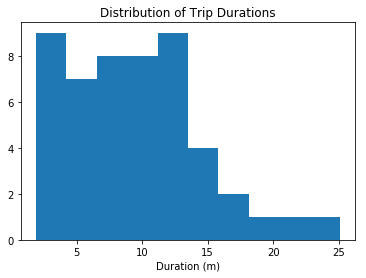

In [15]:
# load library
import matplotlib.pyplot as plt

%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

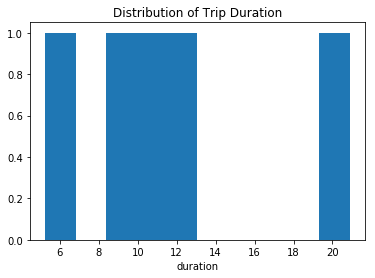

In [16]:
# load library
import matplotlib.pyplot as plt
import pandas as pd
# Read data from CSV file of NYC-Summary-2016
df = pd.read_csv('NYC-2016-Summary.csv',delimiter=',')

duration = df['duration'].head()
plt.hist(duration)
plt.title('Distribution of Trip Duration')
plt.xlabel('duration')
plt.show()

If you followed the use of the .hist() and .show() functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the .hist() function to limit the range of data that is plotted. Documentation for the function can be found [here].

Question 5: Use the parameters of the .hist() function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For NYC Subscriber Trip Durations, the peak is in 5-10 min bin, skewed to the Right.
For NYC Customer Trip Durations, the peak is in 20-25 min bin, skewed to the Right.

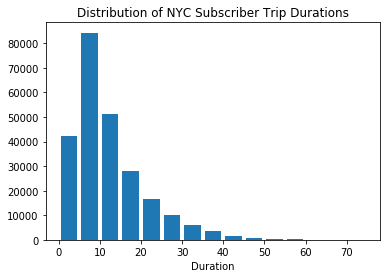

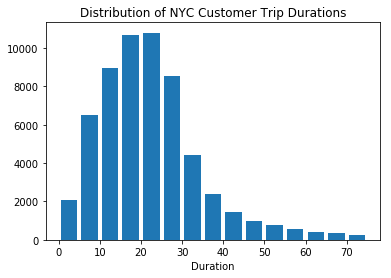

In [17]:
## Use this and additional cells to answer Question 5. ##

substriber_data=[]
customer_data=[]

def list_trips(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                substriber_data.append(float(row['duration']))
            else:
                customer_data.append(float(row['duration']))
        return (substriber_data,customer_data)
    
data_file = 'NYC-2016-Summary.csv'
bins =[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

plt.hist(list_trips(data_file)[0],bins,histtype='bar',rwidth=0.8)
plt.title('Distribution of NYC Subscriber Trip Durations')
plt.xlabel('Duration')
plt.show()

plt.hist(list_trips(data_file)[1],bins,histtype='bar',rwidth=0.8)
plt.title('Distribution of NYC Customer Trip Durations')
plt.xlabel('Duration')
plt.show()

### Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

How does ridership differ by month or season?
Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?
If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the Pyplot documentation. In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The documentation page for .bar() includes links at the bottom of the page with examples for you to build off of for your own use.

Question 6: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

Answer: Washington: Summer has the highest ridership, which is 21859, and Summer has the highest subscriber ridership, which is 16160
NYC: Fall has the highest ridership, which is 88366, and Fall has the highest subscriber ridership, which is 78554
Chicago: Summer has the highest ridership, which is 29890, and Summer has the highest subscriber ridership, which is 21198

Washington: Summer has the highest ridership, which is 21859, and Summer has the highest subscriber ridership, which is 16160
NYC: Fall has the highest ridership, which is 88366, and Fall has the highest subscriber ridership, which is 78554
Chicago: Summer has the highest ridership, which is 29890, and Summer has the highest subscriber ridership, which is 21198


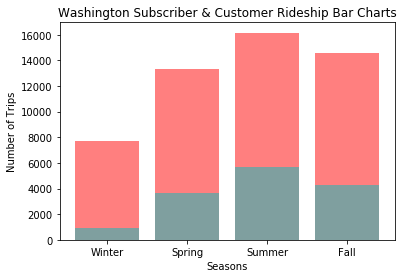

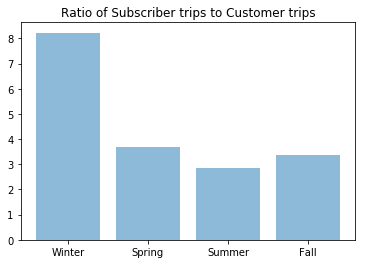

In [18]:
def month_of_trips(filename):
  
    with open(filename, 'r') as f_in:
        
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
         # Define the variable for each days
        winter =[12,1,2]
        spring =[3,4,5]
        summer =[6,7,8]
        fall = [9,10,11]
        
        n_winter_sub = 0
        n_spring_sub = 0
        n_summer_sub = 0
        n_fall_sub = 0
        
        n_winter_cus = 0
        n_spring_cus = 0
        n_summer_cus = 0
        n_fall_cus = 0
        
        # convert the data 
        for row in reader:
            if row['user_type'] == 'Subscriber':
                if  int(row['month']) in  winter:
                    n_winter_sub += 1
                elif int(row['month']) in  spring:
                    n_spring_sub += 1
                elif int(row['month']) in  summer:
                    n_summer_sub += 1
                else:
                    n_fall_sub += 1
            else: 
                if  int(row['month']) in  winter:
                    n_winter_cus += 1
                elif int(row['month']) in  spring:
                    n_spring_cus += 1
                elif int(row['month']) in  summer:
                    n_summer_cus += 1
                else:
                    n_fall_cus += 1
        
        ratio_winter = n_winter_sub/n_winter_cus
        ratio_spring = n_spring_sub/n_spring_cus
        ratio_summer = n_summer_sub/n_summer_cus
        ratio_fall = n_fall_sub/n_fall_cus
        
        n_winter = n_winter_sub+n_winter_cus
        n_spring = n_spring_sub+n_spring_cus
        n_summer = n_summer_sub+n_summer_cus
        n_fall = n_fall_sub+ n_fall_cus
        
        subscriber_season ={"Winter": n_winter_sub,"Spring": n_spring_sub,"Summer": n_summer_sub, "Fall":n_fall_sub}
        customer_season = {"Winter": n_winter_cus,"Spring": n_spring_cus,'Summer': n_summer_cus,'Fall': n_fall_cus} 
        ratio = {"Winter":ratio_winter,"Spring":ratio_spring,'Summer': ratio_summer,'Fall':ratio_fall}
        n = {"Winter":n_winter,"Spring":n_spring,'Summer': n_summer,'Fall':n_fall}
        
        # return 4 dictionary
        return subscriber_season,customer_season, ratio, n

data_file1 = 'Washington-2016-Summary.csv'
data_file2 = 'NYC-2016-Summary.csv'
data_file3 = 'Chicago-2016-Summary.csv'

subscriber_season1, customer_season1, ratio1,n1 = month_of_trips(data_file1) # Get Washington's season data 
max1 =max(n1, key=n1.get) 
maximum1 = max(subscriber_season1, key=subscriber_season1.get)  
print("Washington: {} has the highest ridership, which is {}, and {} has the highest subscriber ridership, which is {}"
      .format(max1, n1[max1],maximum1, subscriber_season1[maximum1]))


subscriber_season2, customer_season2, ratio2,n2 = month_of_trips(data_file2) # Get NYC's season data 
max2 =max(n2, key=n2.get) 
maximum2 = max(subscriber_season2, key=subscriber_season2.get)  
print("NYC: {} has the highest ridership, which is {}, and {} has the highest subscriber ridership, which is {}".
      format(max2, n2[max2],maximum2, subscriber_season2[maximum2]))

subscriber_season3, customer_season3, ratio3,n3= month_of_trips(data_file3) # Get Chicago's season data 
max3 =max(n3, key=n3.get) 
maximum3 = max(subscriber_season3, key=subscriber_season3.get)  
print("Chicago: {} has the highest ridership, which is {}, and {} has the highest subscriber ridership, which is {}".
      format(max3, n3[max3],maximum3, subscriber_season3[maximum3]))


# Create Bar chart for Subscriber & Customer Rideship
x =  [ k for k in subscriber_season1 ]
y = [v for v in subscriber_season1.values()]
x_pos =np.arange(len(x))

x2 = [ k for k in customer_season1]
y2 = [v for v in customer_season1.values()]
x2_pos =np.arange(len(x2))

plt.bar(x,y,  alpha=0.5, label ='Subscriber', color = 'r')
plt.bar(x2,y2, alpha=0.5, label ='Customer', color ='c')

plt.title('Washington Subscriber & Customer Rideship Bar Charts')
plt.xlabel('Seasons')
plt.ylabel('Number of Trips')
plt.show()

x3 = [ k for k in ratio1]
y3 = [v for v in ratio1.values()]
plt.bar(x3,y3,  alpha=0.5, label ='Ratio')
plt.title('Ratio of Subscriber trips to Customer trips')
plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Sales & Marketing.
Data analysis helps to reshape relationships and interact with customers, and to market products more effectively, resulting in sales activation and increase.
There are four ways in which data analysis can help to stimulate sales:

1. Market fragmentation:

Data analysis allows customer segmentation by age, location, shopping habits, product usage, and aggregation of similar data.
This allows the creation of customized and effective messages with each category of customers, whether they include people living in the same area or who are interested in the same habit or activity.
Retail segmentation also helps to identify the most profitable groups of the company.
This enables the company to focus on these categories and avoid wasting time and money on marketing for segments that are not interested in the product and are not likely to become potential customers.

2. Promote product development:
In order to maintain market competitiveness that is fully based on customers, it is necessary to develop products according to customers' opinions and observations.
Data analysis helps identify successful and unsuccessful products and services, thus improving the quality of the product or service offered and distinguishing from competitors based on information and statistics.

3. Flexibility:
Because the world is developing very rapidly, companies have to be more flexible in dealing with the needs of customers that are constantly changing.
Data analysis helps to understand customer behavior and predict how this behavior will change in the future, helping to identify the causes of customer loss, and develop products and services to keep them.

4. Innovation and change of industries:
This is largely the case for startups that have been able to make major changes in industries by relying primarily on data such as Ober and Karim.
An example of this is self-driving vehicles, which are expected to become the most transformative technologies for the future transport industry.
These cars rely on a huge amount of data, and generate billions of new data every time you use them.
For example, Google's Waimo Autonomous Vehicle generates gigabytes of data every second to see where and how to drive safely.



In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0